In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics 

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [43]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_level4_feature_selection.csv', encoding='latin1',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169001 entries, 0 to 169000
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              169001 non-null  int64  
 1   Host Response Time      169001 non-null  float64
 2   Is Superhost            169001 non-null  float64
 3   neighbourhood           169001 non-null  float64
 4   Postal Code             169001 non-null  float64
 5   Is Exact Location       169001 non-null  float64
 6   Property Type           169001 non-null  float64
 7   Accomodates             169001 non-null  float64
 8   Beds                    169001 non-null  float64
 9   Guests Included         169001 non-null  float64
 10  Min Nights              169001 non-null  float64
 11  Reviews                 169001 non-null  float64
 12  Overall Rating          169001 non-null  float64
 13  Cleanliness Rating      169001 non-null  float64
 14  Location Rating     

In [44]:
def regressionMetrics(y, yhat):
    y = np.asarray(y)
    yhat = np.asarray(yhat)

    res = {'MSE': metrics.mean_squared_error(y, yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
           'MAE': metrics.mean_absolute_error(y, yhat)
          }
    return res

In [45]:
X = df.loc[:,df.columns != 'Price']
y = df['Price']

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)


In [47]:
regressionMetrics(y, pred1)

{'MSE': 61687061.5509944, 'RMSE': 7854.11112418168, 'MAE': 442.8653866681845}

In [48]:
#divided the data to 2 groups 

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the 80th percentile value of 'price'
price_80th_percentile = np.percentile(y, 80)

# Split data into two subsets
mask = y <= price_80th_percentile
X1, y1 = X[mask], y[mask]  # Data up to 80th percentile
X2, y2 = X[~mask], y[~mask]  # Data above 80th percentile

# Initialize the models
model1 = LinearRegression()
model2 = LinearRegression()

# Fit the models
model1.fit(X1, y1)
model2.fit(X2, y2)

# Make predictions
y_pred1 = model1.predict(X1)
y_pred2 = model2.predict(X2)

# Evaluate the models
mse1 = mean_squared_error(y1, y_pred1)
mse2 = mean_squared_error(y2, y_pred2)
rmse1 = np.sqrt(mse1)  # Root Mean Squared Error for model 1
rmse2 = np.sqrt(mse2)  # Root Mean Squared Error for model 2
r2_1 = r2_score(y1, y_pred1)
r2_2 = r2_score(y2, y_pred2)
print("Model 1 ")
print("Model 1 (<= 80th percentile) MSE:", mse1)
print("Model 1 (<= 80th percentile) RMSE:", rmse1)
print("Model 1 (<= 80th percentile) R²:", r2_1)
print("\n Model 2 ")
print("Model 2 (> 80th percentile) MSE:", mse2)
print("Model 2 (> 80th percentile) RMSE:", rmse2)
print("Model 2 (> 80th percentile) R²:", r2_2)

Model 1 
Model 1 (<= 80th percentile) MSE: 263.0214664768914
Model 1 (<= 80th percentile) RMSE: 16.217936566557764
Model 1 (<= 80th percentile) R²: 0.23239238809459228

 Model 2 
Model 2 (> 80th percentile) MSE: 305895997.95412123
Model 2 (> 80th percentile) RMSE: 17489.882731285572
Model 2 (> 80th percentile) R²: 0.008960284573250044


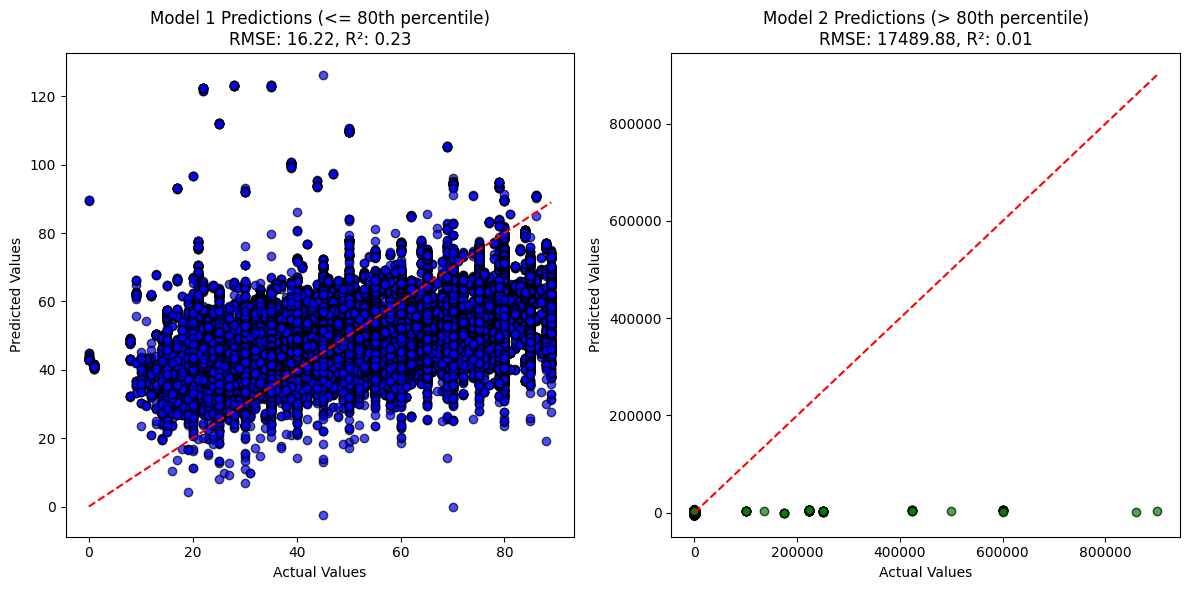

In [49]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Plot for Model 1 (<= 80th percentile)
plt.subplot(1, 2, 1)
plt.scatter(y1, y_pred1, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--')  # Diagonal line
plt.title(f'Model 1 Predictions (<= 80th percentile)\nRMSE: {rmse1:.2f}, R²: {r2_1:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot for Model 2 (> 80th percentile)
plt.subplot(1, 2, 2)
plt.scatter(y2, y_pred2, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(y2), max(y2)], [min(y2), max(y2)], color='red', linestyle='--')  # Diagonal line
plt.title(f'Model 2 Predictions (> 80th percentile)\nRMSE: {rmse2:.2f}, R²: {r2_2:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()